In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.gridspec as gridspec
# import seaborn as sns
from pycirclize import Circos

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
node_info = pd.read_csv(f'{Project}/Results/Plots/Mitochondria/PPI/Hierarchical_edge_bundling/RD_GSEA_GOCC_lowest3terms_lead/v20240309/node_info_manual-mod.tsv', sep='\t')

for day in ['4','8']:
    node_info[f'RD{day}'] = node_info[[f'RD{day}{rep}' for rep in ['a','b','c']]].mean(axis=1)
node_info = node_info.rename(columns={'from':'Group', 'to':'gene_name'}).dropna() #.replace(np.nan, 0)

tmp = node_info[['Group']].drop_duplicates()
tmp['color'] = ['#FA57FF','#EDBA2B','#EF780C','#81C81E','#228AE5','#9EB0FB','#7950F1','#77849D','#333366','#990099','#AAAAAA']
node_info = pd.merge(node_info, tmp, on='Group', how='left')

node_info = node_info[::-1]
node_info['Group'] = pd.Categorical(node_info['Group'], categories=list(node_info[['Group']].drop_duplicates()['Group']))
node_info['Group_coord'] = [j+0.5 for i in node_info.groupby('Group').count()['gene_name'] for j in range(i)]
display(node_info)


edge_info = pd.read_csv(f'{Project}/Results/Plots/Mitochondria/PPI/Hierarchical_edge_bundling/RD_GSEA_GOCC_lowest3terms_lead/v20240309/edge_info.tsv', sep='\t')
edge_info = edge_info.replace('Ndufb1-ps', np.nan).dropna()
edge_info = pd.merge(node_info[['Group','Group_coord','gene_name']].rename(columns={'Group':'to_Group', 'Group_coord':'to_Group_coord', 'gene_name':'to'}), edge_info, on='to', how='right')
edge_info = pd.merge(node_info[['Group','Group_coord','gene_name']].rename(columns={'Group':'from_Group', 'Group_coord':'from_Group_coord', 'gene_name':'from'}), edge_info, on='from', how='right')
display(edge_info)

,Group,gene_name,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c,RD4,RD8,color,Group_coord
96,None,Rab5if,-0.334623,-0.434883,-0.197665,-0.081655,-0.160238,-0.304092,-0.322390,-0.181995,#AAAAAA,0.5
95,None,Phb,-0.457415,-0.120292,-0.706653,0.317011,-0.617663,-0.324291,-0.428120,-0.208314,#AAAAAA,1.5
94,None,Immp2l,-0.951407,-0.930714,-0.565419,-0.361801,-1.241555,-0.956161,-0.815847,-0.853172,#AAAAAA,2.5
93,None,Higd1a,-0.413895,-0.456240,-0.156658,-0.261648,-0.530009,-0.430454,-0.342264,-0.407371,#AAAAAA,3.5
92,MICOS complex,Micos13,-0.655327,-0.168724,-0.136811,-0.037025,-0.353230,-0.208057,-0.320287,-0.199438,#990099,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Mitochondrial respiratory chain complex I,Ndufa5,-1.283524,-0.252336,-0.696192,-0.664822,-0.664606,-0.586755,-0.744017,-0.638728,#FA57FF,30.5
3,Mitochondrial respiratory chain complex I,Ndufa3,-0.626052,-0.371937,-0.041431,-0.353686,-0.933727,-0.418793,-0.346473,-0.568735,#FA57FF,31.5
2,Mitochondrial respiratory chain complex I,Ndufa2,-0.908204,-0.255405,-0.433976,-0.495858,-1.090883,-0.829973,-0.532528,-0.805571,#FA57FF,32.5
1,Mitochondrial respiratory chain complex I,Ndufa1,-0.840613,-0.394426,-0.235501,-0.337839,-0.809830,-0.384136,-0.490180,-0.510602,#FA57FF,33.5


,from_Group,from_Group_coord,from,to_Group,to_Group_coord,to,value
0,m-AAA complex,1.5,Afg3l1,None,1.5,Phb,0.400
1,m-AAA complex,1.5,Afg3l1,m-AAA complex,0.5,Afg3l2,0.965
2,m-AAA complex,0.5,Afg3l2,Uniplex complex,0.5,Smdt1,0.499
3,m-AAA complex,0.5,Afg3l2,None,1.5,Phb,0.687
4,Mitochondrial proton-transporting ATP synthase...,10.5,Atp5b,Respiratory chain complex IV,16.5,Cox5a,0.463
...,...,...,...,...,...,...,...
1413,Mitochondrial respiratory chain complex I,3.5,mt-Nd3,Mitochondrial respiratory chain complex I,0.5,mt-Nd6,0.999
1414,Mitochondrial respiratory chain complex I,3.5,mt-Nd3,Mitochondrial respiratory chain complex I,2.5,mt-Nd4,0.999
1415,Mitochondrial respiratory chain complex I,2.5,mt-Nd4,Mitochondrial respiratory chain complex I,0.5,mt-Nd6,0.998
1416,Mitochondrial respiratory chain complex I,2.5,mt-Nd4,Mitochondrial respiratory chain complex I,1.5,mt-Nd5,0.999


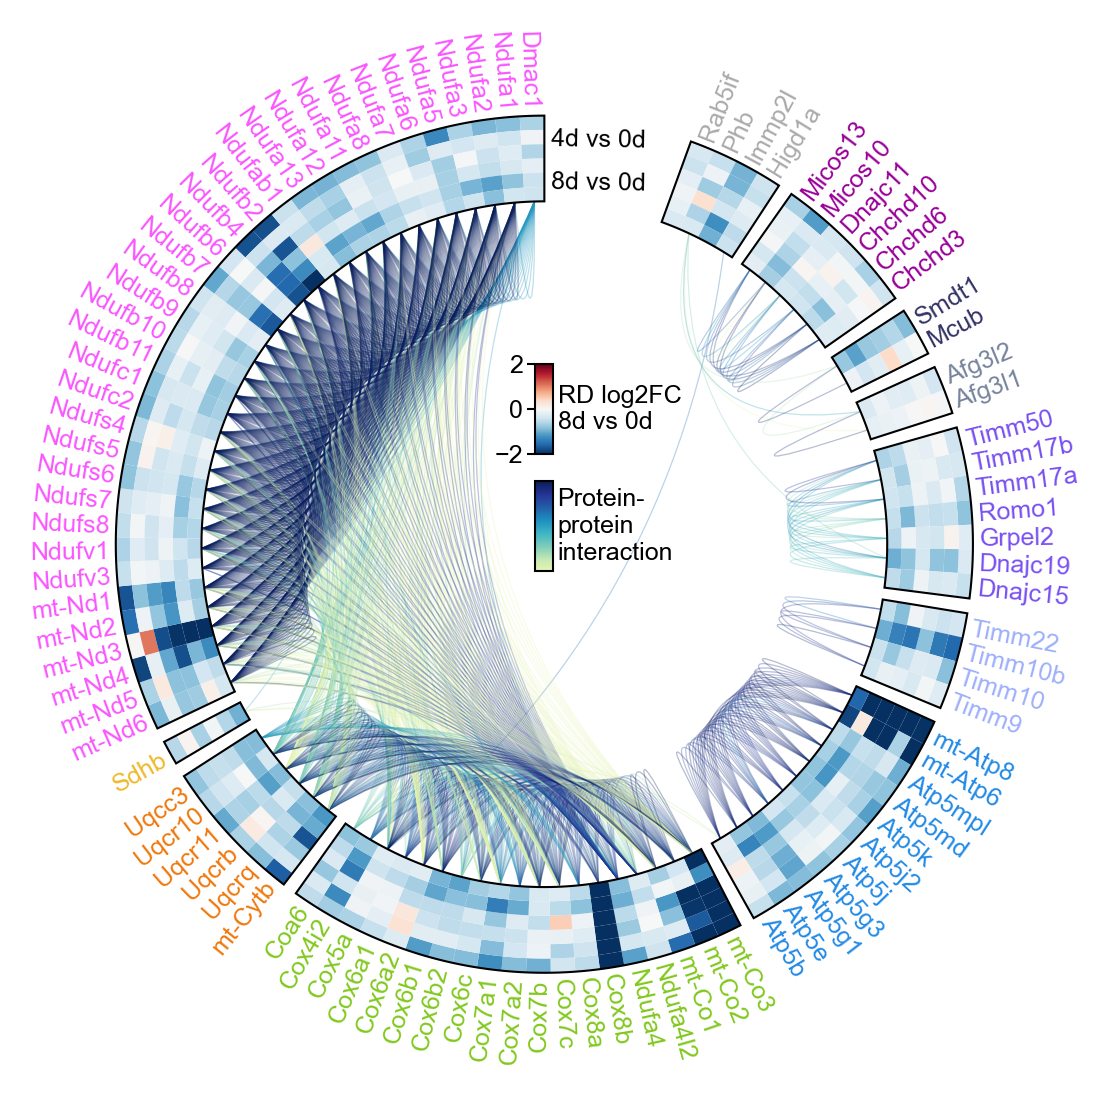

<Figure size 640x480 with 0 Axes>

In [3]:
sF = 1 # Size factor
wgap = 0
hgap = 0
nrow, ncol = 1, 1

height_ratios = [3]*nrow
width_ratios = [3]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


row = 0
col = 0

ax = fig.add_subplot(grid[row,col], projection="polar")



# RD logFC heatmap
sectors = node_info.groupby('Group').count()['gene_name'].to_dict()
circos = Circos(sectors, space=2, start=20, endspace=False)

for sector, (Group,data) in zip(circos.sectors, node_info.groupby('Group')):
    vmin, vmax = -2, 2
    plot_data = data[[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']]].T
    # plot_data = data[[f'RD{day}' for day in ['4','8']]].T
    for col in plot_data:
        plot_data.loc[plot_data[col]<vmin, col] = vmin
        plot_data.loc[plot_data[col]>vmax, col] = vmax

    track1 = sector.add_track((80, 100))
    track1.axis(lw=0.5)
    track1.heatmap(plot_data,
                   cmap='RdBu_r', vmin=vmin, vmax=vmax,
                   rect_kws=dict(lw=0)
                   )
    
    track1.xticks(np.array(range(sector.size))+0.5, data['gene_name'], 
                  label_size=6, label_orientation='vertical', label_margin=1.5, 
                  text_kws = {'color':list(data['color'])[0]},
                  tick_length=0)
    if Group=='Mitochondrial respiratory chain complex I':
        # track1.yticks(np.array(range(6))+0.5, [f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']][::-1], vmin=0, vmax=6, label_size=6)
        track1.yticks([1.5, 4.5], ['4d vs 0d','8d vs 0d'][::-1], vmin=0, vmax=6, 
                      label_size=6, label_margin=1,
                      tick_length=0)

plot = ax.scatter([0],[0], c=[0.4], s=0, cmap = 'RdBu_r', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(plot, ax=ax, cax = ax.inset_axes([0.49, 0.6, 0.02, 0.1]), orientation='vertical')
cbar.ax.set_ylim(vmin, vmax)
cbar.ax.set_yticks([-2,0,2])
cbar.ax.yaxis.tick_left()
cbar.ax.tick_params(width=0.5, length=2, pad=1)
cbar.ax.set_ylabel('RD log2FC\n8d vs 0d', labelpad=1, fontsize=6, rotation=0, ha='left', va='center')



# Protein-protein interaction
link_info = edge_info.copy()

clim = [0.3, 1]
c = link_info['value']
colors = mpl.cm.YlGnBu((c-clim[0]) / (clim[1]-clim[0]))
link_info['color'] = [mpl.colors.rgb2hex(c) for c in colors]

for i,row in link_info.iterrows():
    circos.link_line((row['from_Group'],row['from_Group_coord']), (row['to_Group'],row['to_Group_coord']),
                     color=row['color'], height_ratio=0.15,
                     **{'alpha':0.3, 'lw':0.3})

circos.plotfig(ax=ax)

plot = ax.scatter([0],[0], c=[0.4], s=0, cmap = 'YlGnBu', vmin=clim[0], vmax=clim[1])
cbar = plt.colorbar(plot, ax=ax, cax = ax.inset_axes([0.49, 0.47, 0.02, 0.1]), orientation='vertical')
cbar.ax.set_ylim(0.4, 1)
cbar.ax.set_yticks([])
cbar.ax.set_ylabel('Protein-\nprotein\ninteraction', labelpad=1, fontsize=6, rotation=0, ha='left', va='center')

# plt.savefig('.pdf', bbox_inches='tight')
plt.show()
plt.clf()

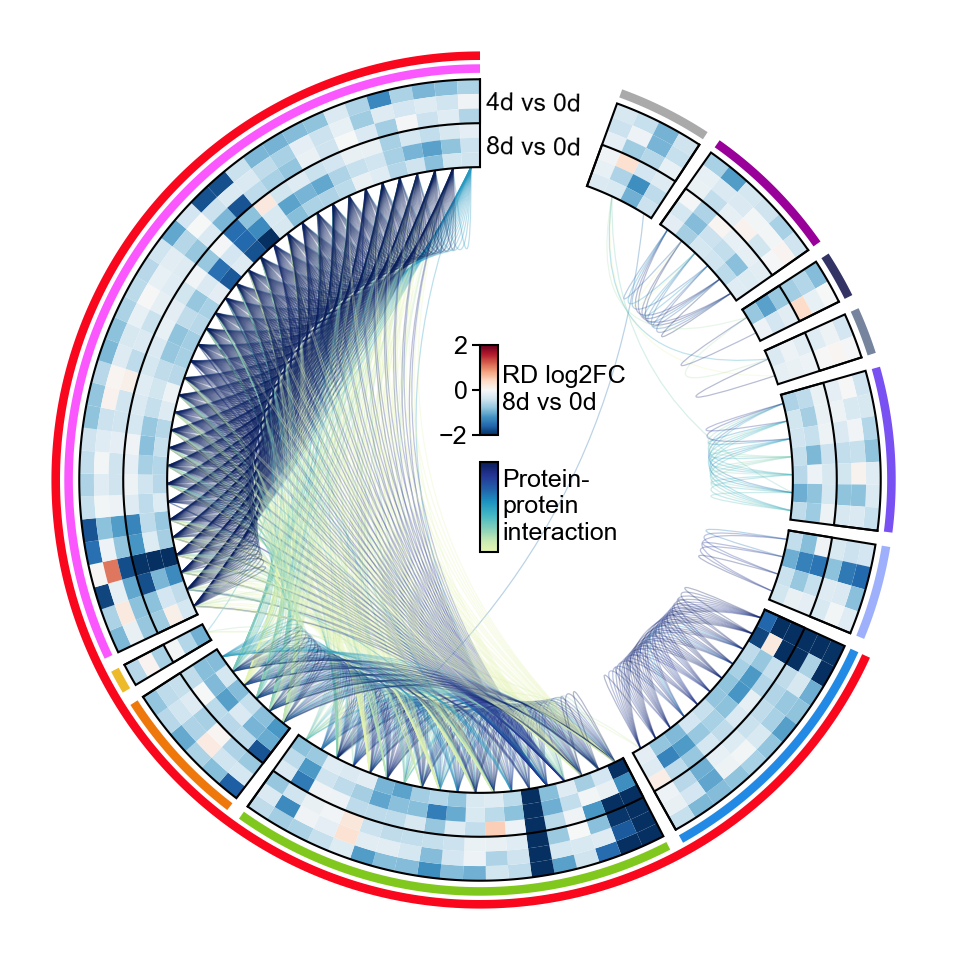

<Figure size 640x480 with 0 Axes>

In [4]:
sF = 1 # Size factor
wgap = 0
hgap = 0
nrow, ncol = 1, 1

height_ratios = [3]*nrow
width_ratios = [3]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


row = 0
col = 0

ax = fig.add_subplot(grid[row,col], projection="polar")



# RD logFC heatmap
sectors = node_info.groupby('Group').count()['gene_name'].to_dict()
circos = Circos(sectors, space=2, start=20, endspace=False)

for sector, (Group,data) in zip(circos.sectors, node_info.groupby('Group')):
    vmin, vmax = -2, 2
    plot_data = data[[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']]].T
    # plot_data = data[[f'RD{day}' for day in ['4','8']]].T
    for col in plot_data:
        plot_data.loc[plot_data[col]<vmin, col] = vmin
        plot_data.loc[plot_data[col]>vmax, col] = vmax

    track1 = sector.add_track((73, 93.5))
    track1.axis(lw=0.5)
    track1.heatmap(plot_data,
                   cmap='RdBu_r', vmin=vmin, vmax=vmax,
                   rect_kws=dict(lw=0)
                   )
    track1.line([track1.start, track1.start, track1.end, track1.end], [0,1,1,2], lw=0.5, ls='-', c='k')
    
    # track1.xticks(np.array(range(sector.size))+0.5, data['gene_name'], 
    #               label_size=6, label_orientation='vertical', label_margin=1.5, 
    #               text_kws = {'color':list(data['color'])[0]},
    #               tick_length=0)
    if Group=='Mitochondrial respiratory chain complex I':
        # track1.yticks(np.array(range(6))+0.5, [f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']][::-1], vmin=0, vmax=6, label_size=6)
        track1.yticks([1.5, 4.5], ['4d vs 0d','8d vs 0d'][::-1], vmin=0, vmax=6, 
                      label_size=6, label_margin=1,
                      tick_length=0)
    
    track2 = sector.add_track((95, 97))
    track2.axis(fc=list(data['color'])[0], lw=0)

circos.rect(r_lim=(98, 100), deg_lim=(114.5, 360), fc="#F8071D", lw=0)

plot = ax.scatter([0],[0], c=[0.4], s=0, cmap = 'RdBu_r', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(plot, ax=ax, cax = ax.inset_axes([0.5, 0.55, 0.02, 0.1]), orientation='vertical')
cbar.ax.set_ylim(vmin, vmax)
cbar.ax.set_yticks([-2,0,2])
cbar.ax.yaxis.tick_left()
cbar.ax.tick_params(width=0.5, length=2, pad=1)
cbar.ax.set_ylabel('RD log2FC\n8d vs 0d', labelpad=1, fontsize=6, rotation=0, ha='left', va='center')



# Protein-protein interaction
link_info = edge_info.copy()

clim = [0.3, 1]
c = link_info['value']
colors = mpl.cm.YlGnBu((c-clim[0]) / (clim[1]-clim[0]))
link_info['color'] = [mpl.colors.rgb2hex(c) for c in colors]

for i,row in link_info.iterrows():
    circos.link_line((row['from_Group'],row['from_Group_coord']), (row['to_Group'],row['to_Group_coord']),
                     color=row['color'], height_ratio=0.15,
                     **{'alpha':0.3, 'lw':0.3})

circos.plotfig(ax=ax)

plot = ax.scatter([0],[0], c=[0.4], s=0, cmap = 'YlGnBu', vmin=clim[0], vmax=clim[1])
cbar = plt.colorbar(plot, ax=ax, cax = ax.inset_axes([0.5, 0.42, 0.02, 0.1]), orientation='vertical')
cbar.ax.set_ylim(0.4, 1)
cbar.ax.set_yticks([])
cbar.ax.set_ylabel('Protein-\nprotein\ninteraction', labelpad=1, fontsize=6, rotation=0, ha='left', va='center')

plt.savefig('circleHeat.pdf', bbox_inches='tight')
plt.show()
plt.clf()

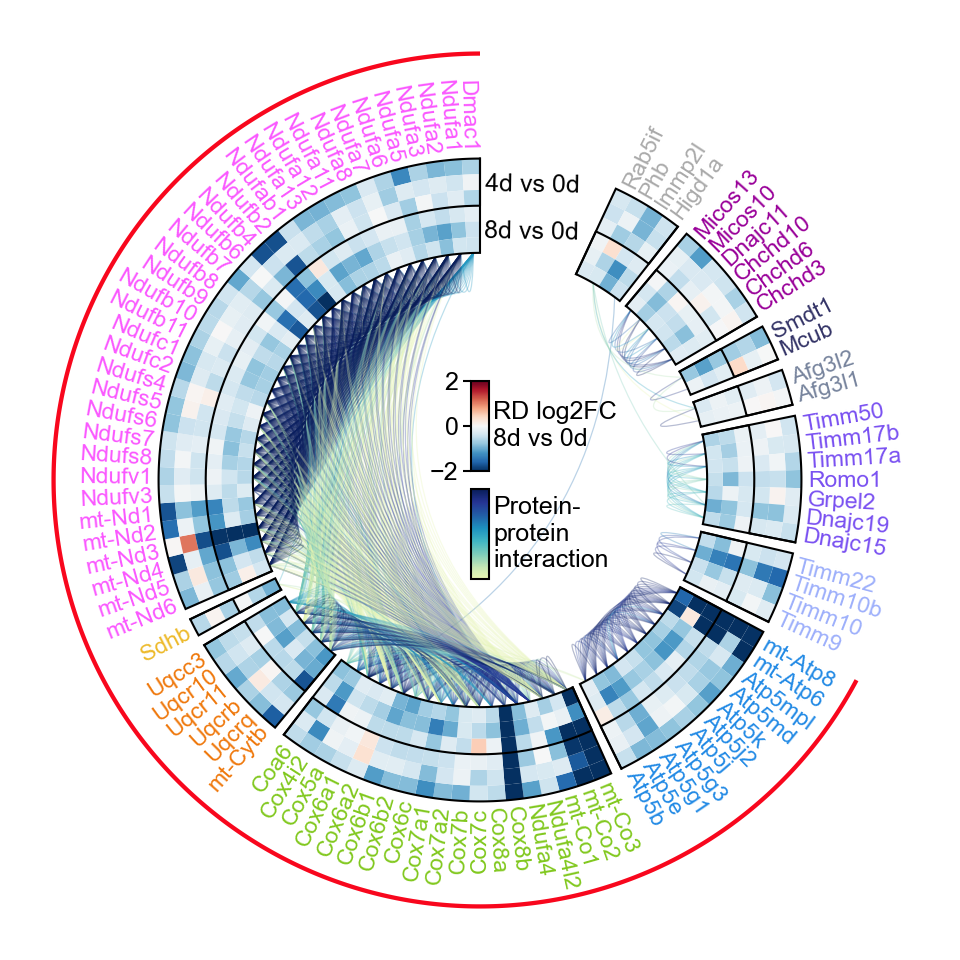

<Figure size 640x480 with 0 Axes>

In [7]:
sF = 1 # Size factor
wgap = 0
hgap = 0
nrow, ncol = 1, 1

height_ratios = [3]*nrow
width_ratios = [3]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


row = 0
col = 0

ax = fig.add_subplot(grid[row,col], projection="polar")



# RD logFC heatmap
sectors = node_info.groupby('Group').count()['gene_name'].to_dict()
circos = Circos(sectors, space=2, start=25, endspace=False)

for sector, (Group,data) in zip(circos.sectors, node_info.groupby('Group')):
    vmin, vmax = -2, 2
    plot_data = data[[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']]].T
    # plot_data = data[[f'RD{day}' for day in ['4','8']]].T
    for col in plot_data:
        plot_data.loc[plot_data[col]<vmin, col] = vmin
        plot_data.loc[plot_data[col]>vmax, col] = vmax

    track1 = sector.add_track((53, 75))
    track1.axis(lw=0.5)
    track1.heatmap(plot_data,
                   cmap='RdBu_r', vmin=vmin, vmax=vmax,
                   rect_kws=dict(lw=0)
                   )
    track1.line([track1.start, track1.start, track1.end, track1.end], [0,1,1,2], lw=0.5, ls='-', c='k')
    
    track1.xticks(np.array(range(sector.size))+0.5, data['gene_name'], 
                  label_size=5.5, label_orientation='vertical', label_margin=1.5, 
                  text_kws = {'color':list(data['color'])[0]},
                  tick_length=0)
    if Group=='Mitochondrial respiratory chain complex I':
        # track1.yticks(np.array(range(6))+0.5, [f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']][::-1], vmin=0, vmax=6, label_size=6)
        track1.yticks([1.5, 4.5], ['4d vs 0d','8d vs 0d'][::-1], vmin=0, vmax=6, 
                      label_size=6, label_margin=1,
                      tick_length=0)
    
circos.rect(r_lim=(99, 100), deg_lim=(118, 360), fc="#F8071D", lw=0)

plot = ax.scatter([0],[0], c=[0.4], s=0, cmap = 'RdBu_r', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(plot, ax=ax, cax = ax.inset_axes([0.49, 0.51, 0.02, 0.1]), orientation='vertical')
cbar.ax.set_ylim(vmin, vmax)
cbar.ax.set_yticks([-2,0,2])
cbar.ax.yaxis.tick_left()
cbar.ax.tick_params(width=0.5, length=2, pad=1)
cbar.ax.set_ylabel('RD log2FC\n8d vs 0d', labelpad=1, fontsize=6, rotation=0, ha='left', va='center')



# Protein-protein interaction
link_info = edge_info.copy()

clim = [0.3, 1]
c = link_info['value']
colors = mpl.cm.YlGnBu((c-clim[0]) / (clim[1]-clim[0]))
link_info['color'] = [mpl.colors.rgb2hex(c) for c in colors]

for i,row in link_info.iterrows():
    circos.link_line((row['from_Group'],row['from_Group_coord']), (row['to_Group'],row['to_Group_coord']),
                     color=row['color'], height_ratio=0.15,
                     **{'alpha':0.3, 'lw':0.3})

circos.plotfig(ax=ax)

plot = ax.scatter([0],[0], c=[0.4], s=0, cmap = 'YlGnBu', vmin=clim[0], vmax=clim[1])
cbar = plt.colorbar(plot, ax=ax, cax = ax.inset_axes([0.49, 0.39, 0.02, 0.1]), orientation='vertical')
cbar.ax.set_ylim(0.4, 1)
cbar.ax.set_yticks([])
cbar.ax.set_ylabel('Protein-\nprotein\ninteraction', labelpad=1, fontsize=6, rotation=0, ha='left', va='center')

plt.savefig('circleHeat2.pdf', bbox_inches='tight')
plt.show()
plt.clf()